# Resumen Machine Learning

En este notebook resumimos cómo usar los diferentes algoritmos de ML, así como alguna cosita más que pueda ayudarnos.

*Nota: Este resumen está abierto a sugerencias ;)*

## Índice:

<!-- 1. <a style='font-size:16pt' href='#Basic_EDA'>Basic EDA</a> -->
1. [Basic EDA](#Basic_EDA)
    1. [Generación de puntos](#Generacion_de_puntos)
    2. [Gráfico de líneas](#Grafico_de_lineas)
    3. [Gráfico de dispersión](#Grafico_de_dispersion)
    4. [Matriz de correlación](#Matriz_de_correlacion)
1. [Mínimo tratamiento de datos](#Minimo_Tratamiento_de_Datos)
    1. [Mapear](#Mapear)
    2. [One Hot Encoding (dummies)](#One_Hot_Encoding)
    3. [Escalado](#Escalado)
1. [Separación Train/Test](#Separacion_Train_Test)
2. [Algoritmos Supervisados](#Algoritmos_Supervisados)
    1. [Regresión](#Regresion)
        1. [Regresión Lineal](#Regresion_Lineal)
        2. [Regularización](#Regularizacion)
            1. [Ridge](#Ridge)
            1. [Lasso](#Lasso)
            1. [Elastic Net](#Elastic_Net)
        3. [Árboles de decisión](#Regresion_Arboles_de_decision)
        4. [Support Vector Regressor (SVR)](#Support_Vector_Regressor)
            1. [SVR Lineal](#SVR_Lineal)
            1. [SVR con kernel](#SVR_kernel)
    2. [Clasificación](#Clasificacion)
        1. [Regresión Logística](#Regresion_Logistica)
        2. [Árboles de decisión](#Clasificacion_Arboles_de_decision)
        3. [K Nearest Neighbors](#Clasificacion_KNN)
        4. [Support Vector Classifier (SVC)](#Support_Vector_Classifier)
            1. [SVC Lineal](#SVC_Lineal)
            1. [SVC con kernel](#SVC_kernel)
1. [Métricas](#Metricas)
    1. [Regresión](#Metricas_Regresion)
        1. [MAE](#Metricas_MAE)
        2. [MSE](#Metricas_MSE)
        3. [RMSE](#Metricas_RMSE)
        4. [$R^2$](#Metricas_R2)
    2. [Clasificación](#Metricas_Clasificacion)
        1. [Matriz de confusión](#Metricas_Matriz_Confusion)
        2. [Porcentaje de acierto (Accuracy)](#Metricas_Accuracy)
        3. [Precision](#Metricas_Precision)
        4. [Recall](#Metricas_Recall)
        6. [F1](#Metricas_F1)
        7. [AUC y Curva ROC](#Metricas_AUC)
1. [Ejemplos](#Ejemplos)
    1. [Regresión](#Ejemplos_Regresion)
        1. [Regresión Lineal](#Ejemplos_Regresion_Lineal)
        2. [Regularización](#Ejemplos_Regularizacion)
            1. [Ridge](#Ejemplos_Ridge)
            1. [Lasso](#Ejemplos_Lasso)
            1. [Elastic Net](#Ejemplos_Elastic_Net)
        3. [Árboles de decisión](#Ejemplos_Regresion_Arboles_de_decision)
        4. [Support Vector Regressor (SVR)](#Ejemplos_Support_Vector_Regressor)
            1. [SVR Lineal](#Ejemplos_SVR_Lineal)
            1. [SVR con kernel](#Ejemplos_SVR_kernel)
    2. [Clasificación](#Ejemplos_Clasificacion)
        1. [Regresión Logística](#Ejemplos_Regresion_Logistica)
        2. [Árboles de decisión](#Ejemplos_Clasificacion_Arboles_de_decision)
        3. [K Nearest Neighbors](#Ejemplos_Clasificacion_KNN)
        4. [Support Vector Classifier (SVC)](#Ejemplos_Support_Vector_Classifier)
            1. [SVC Lineal](#Ejemplos_SVC_Lineal)
            1. [SVC con kernel](#Ejemplos_SVC_kernel)


In [3]:
# Cosas básicas para ejecutar el notebook
import numpy as np
import pandas as pd

In [251]:
# Para ayudarnos a lo largo de las demostraciones, vamos a ayudarnos del siguiente DataFrame:
np.random.seed(10)
df = pd.DataFrame({'num_1': np.random.rand(100),
                   'cat_1': np.random.choice(['A', 'B', 'C', 'D'], size=100),
                   'num_2': np.random.randint(100, size=100)
                  })
df['num_3'] = df['num_1'] + 2*df['num_2']*np.random.rand(100)
df['num_4'] = (df['num_3'] + np.random.randint(-40, 40, size=100) > 50).astype(int)
df

,num_1,cat_1,num_2,num_3,num_4
0,0.771321,A,0,0.771321,0
1,0.020752,A,44,76.189382,1
2,0.633648,B,68,42.832232,1
3,0.748804,B,14,1.456194,0
4,0.498507,A,4,0.892068,0
...,...,...,...,...,...
95,0.495049,D,92,97.804162,1
96,0.977081,C,19,27.436795,0
97,0.440774,A,0,0.440774,0
98,0.318273,B,7,9.717485,0


<a id='Basic_EDA'></a>
## 1. Basic EDA

Lo primero que debemos hacer es un buen análisis de datos. Como esto es un resumen, simplemente voy a dejarte algunas funciones básicas de representación. Nada del otro mundo.

Tras haber visto algo tan elemental como la generación, pasaremos a ver las gráficas más básicas

<a id='Generacion_de_puntos'></a>
### 1.1 Generación de puntos

In [42]:
# Punto inicial, punto final y cuántos puntos quieres en total:
punto_inicial = 0
punto_final = 10
n_puntos = 11
x = np.linspace(punto_inicial, punto_final, n_puntos)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [11]:
# Punto inicial, punto final (al que no se va a llegar) y distancia entre puntos:
punto_inical = 0
punto_final = 10
paso_numeros = 2
x = np.arange(punto_inicial, punto_final, paso_numeros)
x

array([0, 2, 4, 6, 8])

Tras haber visto algo tan elemental como la generación, pasaremos a ver las gráficas más básicas

<a id='Grafico_de_lineas'></a>
### 1.2 Gráfico de líneas

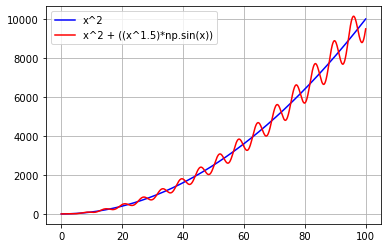

In [40]:
# Generamos puntos para los ejes X e Y (tú tendrás otras variables, claro).
# Por ejemplo, vamos a representar la función x^2 frente a x**2 + ((x**1.5)*np.sin(x))
x = np.linspace(0, 100, 1001)
y = x**2
y2 = x**2 + ((x**1.5)*np.sin(x))

# Importamos la librería así (hacer siempre al principio del notebook, al importar el resto de cosas):
import matplotlib.pyplot as plt
%matplotlib inline

# Y representamos:
plt.plot(x, y, color='blue', label='x^2')
plt.plot(x, y2, color='red', label='x^2 + ((x^1.5)*np.sin(x))')

# Añadimos rejilla:
plt.grid();
# Añadimos leyenda:
plt.legend();

<a id='Grafico_de_dispersion'></a>
### 1.3 Gráfico de dispersión

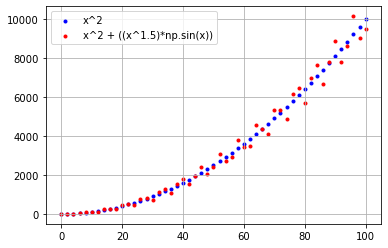

In [41]:
# Generamos puntos para los ejes X e Y (tú tendrás otras variables, claro).
# Por ejemplo, vamos a representar la función x^2 frente a x**2 + ((x**1.5)*np.sin(x))
x = np.linspace(0, 100, 51)
y = x**2
y2 = x**2 + ((x**1.5)*np.sin(x))

# Importamos la librería así (hacer siempre al principio del notebook, al importar el resto de cosas):
import matplotlib.pyplot as plt
%matplotlib inline

# Y representamos:
plt.scatter(x, y, marker='.', color='blue', label='x^2')
plt.scatter(x, y2, marker='.', color='red', label='x^2 + ((x^1.5)*np.sin(x))')

# Añadimos rejilla:
plt.grid();
# Añadimos leyenda:
plt.legend();

<a id='Matriz_de_correlacion'></a>
### 1.4 Matriz de correlación

Otra de las visualizaciones que nos pueden ser de mucha utilidad es la matriz de correlación, ya que nos indicará la relación lineal entre las diferentes variables que tenemos.

Recuerda: Si está cerca de 1 o de -1 tendrá mucha relación lineal (ya sea positiva, es decir, que crezcan en el mismo sentido; o negativa, es decir, que cuando una crece la otra decrece). En cambio, si está cercana a 0, significará que no hay nada de relación.

Para considerar que están fuertemente correlacionadas se suele poner el umbral en ``valor > 0.7`` o ``valor < -0.7``.

In [44]:
np.random.rand(100)

array([0.41139718, 0.45707591, 0.2210309 , 0.75989946, 0.17694577,
       0.16953726, 0.05459819, 0.23700553, 0.41817497, 0.94300566,
       0.22473434, 0.27224565, 0.68090186, 0.34952195, 0.21274716,
       0.26903961, 0.35251465, 0.60749438, 0.88267921, 0.88671876,
       0.95262214, 0.13637179, 0.84483034, 0.21074937, 0.12648217,
       0.73142251, 0.55001578, 0.18333647, 0.26888828, 0.10657065,
       0.70496098, 0.63349555, 0.42086072, 0.78632916, 0.46574764,
       0.55070947, 0.98694062, 0.57278908, 0.01840258, 0.0519209 ,
       0.3586233 , 0.74660752, 0.41260872, 0.61594339, 0.23167236,
       0.79410095, 0.89299008, 0.6997184 , 0.08528349, 0.36895034,
       0.60375027, 0.05302938, 0.2199396 , 0.75519696, 0.30847883,
       0.44964174, 0.45870137, 0.29806624, 0.60950507, 0.47597663,
       0.22025479, 0.87809046, 0.45781825, 0.0842224 , 0.89466349,
       0.55648128, 0.38969494, 0.97352239, 0.51366366, 0.32356794,
       0.18897829, 0.26778941, 0.83504432, 0.4314227 , 0.41998

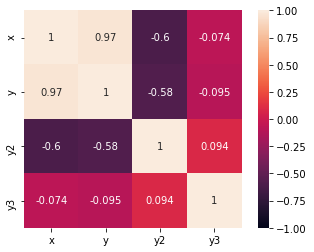

In [56]:
# Vamos a crearnos un DataFrame con datos generados ahora mismo, aunque tú ya tendrás un DataFrame con sus datos y todo)
x = np.linspace(0, 100, 51)
df_ejemplo = pd.DataFrame({'x': x, 'y': x**2, 'y2': -x * np.random.rand(len(x)), 'y3': x**2 * ((x**1.5)*np.sin(x))})

# Importamos la librería seaborn:
import seaborn as sns

# Nos creamos la matriz de correlación:
matriz_correlacion = df_ejemplo.corr()
matriz_correlacion

# Y representamos con u mapa de calor:
sns.heatmap(matriz_correlacion, annot=True, square=True, vmin=-1, vmax=1)


<a id='Minimo_Tratamiento_de_Datos'></a>
## 2. Mínimo tratamiento de datos

Antes de continuar, lo primero que se debe de hacer es convertir las variables a numéricas para que podamos utilizarlas en los modelos.

<a id='Conversion_de_categoricas'></a>
### 2.1 Conversión de categóricas

Básicamente, el modelo no entiende letras, solo números. ASí que tenemos que convertir las palabras a números. Tenemos 2 opciones: "mapear" (cambiar las palabras por números, siendo el mismo número para la misma palabra) o crearse variables "dummy" (crearse una columna por cada valor que pueda tomar la variable):

<a id='Mapear'></a>
#### 2.1.1 Mapear

Idea: sacamos los valores distintos de esa variable categórica. Le asignamos un número distinto a cada palabra. Sustituimos las palabras por los números que hemos deicidido antes.

Problema: estamos asignando un orden a las palabras, por lo que puede no resultar la mejor idea, ya que si estamos convirtiendo, por ejemplo, colores, no tendría mucho sentido decir que un ``verde`` es mejor que un ``morado``, y que este sea peor que un ``azul``.

In [266]:
# Seleccionamos variable a mapear:
# En este caso, será df['cat_1']

# Hacemos una copia para no cambiar el df para el resto de ejercicios:
df_ejemplo = df.copy()

# Y vemos sus valores distintos:
df_ejemplo['cat_1'].unique()

array(['A', 'B', 'D', 'C'], dtype=object)

In [267]:
# Nos creamos un diccionario para hacer la conversión:
map_cat_1 = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3
}

# Y aplicamos el mapeo, guardándolo en una nueva variable:
df_ejemplo['num_cat_1'] = df_ejemplo['cat_1'].map(map_cat_1)

# Comprobamos:
df_ejemplo[['cat_1', 'num_cat_1']]

,cat_1,num_cat_1
0,A,0
1,A,0
2,B,1
3,B,1
4,A,0
...,...,...
95,D,3
96,C,2
97,A,0
98,B,1


In [268]:
# Y nos eliminamos la anterior:
df_ejemplo = df_ejemplo.drop('cat_1', axis=1)

# Mostramos nuestro nuevo dataframe:
df_ejemplo

,num_1,num_2,num_3,num_4,num_cat_1
0,0.771321,0,0.771321,0,0
1,0.020752,44,76.189382,1,0
2,0.633648,68,42.832232,1,1
3,0.748804,14,1.456194,0,1
4,0.498507,4,0.892068,0,0
...,...,...,...,...,...
95,0.495049,92,97.804162,1,3
96,0.977081,19,27.436795,0,2
97,0.440774,0,0.440774,0,0
98,0.318273,7,9.717485,0,1


<a id='One_Hot_Encoding'></a>
#### 2.1.2 One Hot Encoding (dummies)

Idea: nos creamos una nueva columna por cada valor diferente de la/s variable/s categóricas. La función se encarga de convertir todas aquellas categóricas, eliminando las categóricas originales y manteniendo las numéricas originales. Se encarga de todo por nosotros:

In [269]:
# Hacemos una copia para no cambiar el df para el resto de ejercicios:
df_ejemplo = df.copy()

# Hacemos su conversión:
df_ejemplo = pd.get_dummies(df_ejemplo)

# Mostramos:
df_ejemplo

,num_1,num_2,num_3,num_4,cat_1_A,cat_1_B,cat_1_C,cat_1_D
0,0.771321,0,0.771321,0,1,0,0,0
1,0.020752,44,76.189382,1,1,0,0,0
2,0.633648,68,42.832232,1,0,1,0,0
3,0.748804,14,1.456194,0,0,1,0,0
4,0.498507,4,0.892068,0,1,0,0,0
...,...,...,...,...,...,...,...,...
95,0.495049,92,97.804162,1,0,0,0,1
96,0.977081,19,27.436795,0,0,0,1,0
97,0.440774,0,0.440774,0,1,0,0,0
98,0.318273,7,9.717485,0,0,1,0,0


<a id='Escalado'></a>
#### 2.1.3 Escalado

Idea: reducir todas las variables al mismo rango. La función se encarga de quitar la media y escalar a la varianza unidad.

Para utilizarlo, necesitamos un DataFrame con variables numéricas. Al transformar, nos devolverá un array de 2D (no es un DataFrame, pero guarda la misma estructura que el DataFrame original).

In [270]:
# DataFrame numérico:
df_ejemplo = df.copy()
df_ejemplo = df_ejemplo[['num_1', 'num_2', 'num_3', 'num_4']]

# Importamos el objeto:
from sklearn.preprocessing import StandardScaler

# Nos creamos el objeto:
scaler = StandardScaler()

# Entrenamos:
scaler.fit(df_ejemplo)

# Y transformamos:
df_ejemplo = scaler.transform(df_ejemplo)

# Mostramos:
df_ejemplo

array([[ 1.03998617, -1.58196146, -1.05751615, -0.81649658],
       [-1.68958688, -0.03995206,  0.65839203,  1.22474487],
       [ 0.53931661,  0.80114397, -0.10054828,  1.22474487],
       [ 0.95810007, -1.09132211, -1.04193394, -0.81649658],
       [ 0.04785215, -1.44177879, -1.05476891, -0.81649658],
       [-0.947543  , -1.37168745, -1.01954319, -0.81649658],
       [-1.04476502, -0.1100434 , -0.93862485, -0.81649658],
       [ 1.00074671,  0.97637231, -0.20248362, -0.81649658],
       [-1.15005409, -0.03995206,  0.75793002,  1.22474487],
       [-1.4437919 ,  1.57214867,  0.80199938, -0.81649658],
       [ 0.72737474, -0.25022607, -0.83431642, -0.81649658],
       [ 1.70212508, -0.8810481 , -0.31630897,  1.22474487],
       [-1.75069638, -1.26655045, -0.90974029, -0.81649658],
       [ 0.09762094, -0.18013473, -1.0189406 , -0.81649658],
       [ 1.19018193, -1.02123077, -0.43274995,  1.22474487],
       [ 0.46250219,  1.04646365, -0.12501762, -0.81649658],
       [ 0.85973327, -0.

<a id='Separacion_Train_Test'></a>
## 3. Separación Train/Test

Tras convertir nuestras variables, antes de utilizar los modelos, es bueno separar en train y test. ¿Por qué? Porque si entreno sobre train y pruebo los patrones extraídos sobre test, me sirve para comprobar si he generalizado bien. Si no lo hiciésemos, puede que esté "aprendiendo demasiado" de los datos, y cuando vaya a predecir algo de verdad, pues devuelva valores erróneos, haciendo que nuestro modelo no sirva para casi nada.

In [277]:
# Nos copiamos el df para no modificarlo, y lo convertimos para tener solo variables numéricas:
df_ejemplo = df.copy()
df_ejemplo = pd.get_dummies(df_ejemplo)

# Importamos objeto a utilizar:
from sklearn.model_selection import train_test_split

# Separamos las variables que podemos utilizar para predecir de la que queremos predecir:
y_col = 'num_3' # vamos a predecir 'num_3'
X_cols = [col for col in df_ejemplo.columns if col != y_col]

X = df_ejemplo[X_cols]
y = df_ejemplo[y_col]

# Y lo utilizamos:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Ahora ya podemos acceder a las variables de train/test:
#    X_train: variables predictoras con las que entrenar el modelo
#    y_train: variable a predecir (etiquetas de los datos) con la que entrenar el modelo para que extraiga sus patornes en base a X_train
#    X_test: variables predictoras con las que probar el modelo
#    y_test: variable a predecir con la que probar el modelo

<a id='Algoritmos_Supervisados'></a>
## 4. Algoritmos Supervisados


<a id='Regresion'></a>
### 4.1 Regresión

Los algoritmos de regresión nos servirán para predecir valores numéricos. Por ejemplo, predecir cuánto cuesta un producto, cuántas personas van a asistir a un evento, cuánto cobrará una persona... Son valores numéricos, con sus decimales y todo lo que ello supone.

Antes de nada, tenemos que decidir qué vamos a predecir y separar los datos en train y test. En este caso, predeciremos 'num_3', que es numérica:

In [279]:
# Nos copiamos el df para no modificarlo, y lo convertimos para tener solo variables numéricas:
df_ejemplo = df.copy()
df_ejemplo = pd.get_dummies(df_ejemplo)

# Primero debemos separar en train y test (tal como hemos visto antes):
from sklearn.model_selection import train_test_split

y_col = 'num_3' # vamos a predecir 'num_3'
X_cols = [col for col in df_ejemplo.columns if col != y_col]
X = df_ejemplo[X_cols]
y = df_ejemplo[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<a id='Regresion_Lineal'></a>
#### 4.1.1 Regresión Lineal

In [287]:
# Importamos el objeto:
from sklearn.linear_model import LinearRegression

# Creamos el modelo:
model = LinearRegression()

# Entrenamos:
model.fit(X_train, y_train)

# Ahora ya podemos calcular el score (por defecto, R^2):
model.score(X_test, y_test)

0.729902373887442

In [288]:
# También podemos predecir, siempre y cuando le pasemos objetos con la misma estructura que lo que hemos utilizado para entrenar:
model.predict([[0.303063, 2, 1, 0, 0, 0, 0]])

array([45.58467082])

<a id='Arbol_de'></a>
#### 4.1.2 Regularización

Podemos aplicar penalizaciones a las regresiones lineales para generalizar más:

<a id='Ridge'></a>
##### 4.1.2.1 Ridge

In [313]:
# Importamos el objeto:
from sklearn.linear_model import Ridge

# Creamos el modelo:
model = Ridge(alpha = 1)

# Entrenamos:
model.fit(X_train, y_train)

# Ahora ya podemos calcular el score (por defecto, R^2):
model.score(X_test, y_test)

0.7309134320290793

In [314]:
# También podemos predecir, siempre y cuando le pasemos objetos con la misma estructura que lo que hemos utilizado para entrenar:
model.predict([[0.303063, 2, 1, 0, 0, 0, 0]])

array([42.70427574])

<a id='Lasso'></a>
##### 4.1.2.2 Lasso

In [316]:
# Importamos el objeto:
from sklearn.linear_model import Lasso

# Creamos el modelo:
model = Lasso(alpha = 1)

# Entrenamos:
model.fit(X_train, y_train)

# Ahora ya podemos calcular el score (por defecto, R^2):
model.score(X_test, y_test)

0.7464801035834705

In [317]:
# También podemos predecir, siempre y cuando le pasemos objetos con la misma estructura que lo que hemos utilizado para entrenar:
model.predict([[0.303063, 2, 1, 0, 0, 0, 0]])

array([42.33982659])

<a id='Elastic_Net'></a>
##### 4.1.2.3 Elastic Net

In [438]:
# Importamos el objeto:
from sklearn.linear_model import ElasticNet

# Creamos el modelo:
model = ElasticNet(alpha = 1.5, l1_ratio=1)

# Entrenamos:
model.fit(X_train, y_train)

# Ahora ya podemos calcular el score (por defecto, R^2):
model.score(X_test, y_test)

0.7537974356371894

In [439]:
# También podemos predecir, siempre y cuando le pasemos objetos con la misma estructura que lo que hemos utilizado para entrenar:
model.predict([[0.303063, 2, 1, 0, 0, 0, 0]])

array([39.56172836])

<a id='Regresion_Arboles_de_decision'></a>
#### 4.1.3 Árboles de decisión (Regresión)

In [440]:
# Importamos el objeto:
from sklearn.tree import DecisionTreeRegressor

# Creamos el modelo:
model = DecisionTreeRegressor(max_depth=3)

# Entrenamos:
model.fit(X_train, y_train)

# Ahora ya podemos calcular el score (por defecto, R^2):
model.score(X_test, y_test)

0.6492077643749241

In [441]:
# También podemos predecir, siempre y cuando le pasemos objetos con la misma estructura que lo que hemos utilizado para entrenar:
model.predict([[0.303063, 2, 1, 0, 0, 0, 0]])

array([56.63740477])

<a id='Support_Vector_Regressor'></a>
#### 4.1.4 Support Vector Regressor (SVR)

<a id='SVR_Lineal'></a>
##### 4.1.4.1 SVR Lineal

In [449]:
# Importamos el objeto:
from sklearn.svm import LinearSVR

# Creamos el modelo:
model = LinearSVR(epsilon=10)

# Entrenamos:
model.fit(X_train, y_train)

# Ahora ya podemos calcular el score (por defecto, R^2):
model.score(X_test, y_test)

0.6731519250392802

In [450]:
# También podemos predecir, siempre y cuando le pasemos objetos con la misma estructura que lo que hemos utilizado para entrenar:
model.predict([[0.303063, 2, 1, 0, 0, 0, 0]])

array([15.20789158])

<a id='SVR_kernel'></a>
##### 4.1.4.2 SVR con kernel

In [459]:
# Importamos el objeto:
from sklearn.svm import SVR

# Creamos el modelo:
model = SVR(kernel='poly', epsilon=10)

# Entrenamos:
model.fit(X_train, y_train)

# Ahora ya podemos calcular el score (por defecto, R^2):
model.score(X_test, y_test)

0.5891533843824989

In [460]:
# También podemos predecir, siempre y cuando le pasemos objetos con la misma estructura que lo que hemos utilizado para entrenar:
model.predict([[0.303063, 2, 1, 0, 0, 0, 0]])

array([20.08542297])

<a id='Clasificacion'></a>
### 4.2 Clasificación

Los algoritmos de clasificación nos servirán para predecir valores finitos de una variable, es decir, clases. Por ejemplo, predecir a qué conjunto de la población pertenece un individuo (niño, adolescente, adulto o jubilado), predecir si una persona comprará un producto o no, predecir si una persona es diestra o zurda... Son valores finitos que indican categorías. Normalmente, no tienen relación de orden entre ellas.

Antes de nada, al igual que antes, tenemos que decidir qué vamos a predecir y separar los datos en train y test. En este caso, predeciremos 'num_4', que es una variable que solo toma 2 valores (1/0). Pese a ser números como tal, hacen referencia a una clase u otra:

In [637]:
# Nos copiamos el df para no modificarlo, y lo convertimos para tener solo variables numéricas:
df_ejemplo = df.copy()
df_ejemplo = pd.get_dummies(df_ejemplo)

# Primero debemos separar en train y test (tal como hemos visto antes):
from sklearn.model_selection import train_test_split

y_col = 'num_4' # vamos a predecir 'num_4'
X_cols = [col for col in df_ejemplo.columns if col != y_col]
X = df_ejemplo[X_cols]
y = df_ejemplo[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<a id='Regresion_Logistica'></a>
#### 4.2.1 Regresión Logística

In [638]:
# Importamos el objeto:
from sklearn.linear_model import LogisticRegression

# Creamos el modelo:
model = LogisticRegression()

# Entrenamos:
model.fit(X_train, y_train)

# Ahora ya podemos calcular el score (por defecto, accuracy):
model.score(X_test, y_test)

0.8

In [639]:
# También podemos predecir, siempre y cuando le pasemos objetos con la misma estructura que lo que hemos utilizado para entrenar:
model.predict([[0.303063, 2, 1, 0, 0, 0, 1]])

array([0])

In [640]:
# En el caso de los modelos de clasificación, podemos obtener no solo el valor predicho sino la probabilidad de que sea ese valor para el algoritmo:
model.predict_proba([[0.303063, 2, 1, 0, 0, 0, 1]])

array([[0.97112048, 0.02887952]])

<a id='Clasificacion_Arboles_de_decision'></a>
#### 4.2.2 Árboles de decisión

In [548]:
### Importamos el objeto:
from sklearn.tree import DecisionTreeClassifier

# Creamos el modelo:
model = DecisionTreeClassifier(max_depth=2)

# Entrenamos:
model.fit(X_train, y_train)

# Ahora ya podemos calcular el score (por defecto, accuracy):
model.score(X_test, y_test)

0.8333333333333334

In [549]:
# También podemos predecir, siempre y cuando le pasemos objetos con la misma estructura que lo que hemos utilizado para entrenar:
model.predict([[0.303063, 2, 1, 0, 0, 0, 1]])

array([0])

In [552]:
# En el caso de los modelos de clasificación, podemos obtener no solo el valor predicho sino la probabilidad de que sea ese valor para el algoritmo:
model.predict_proba([[0.303063, 2, 1, 0, 0, 0, 1]])

array([[1., 0.]])

<a id='Clasificacion_KNN'></a>
#### 4.2.3 K Nearest Neighbor (KNN)

In [561]:
### Importamos el objeto:
from sklearn.neighbors import KNeighborsClassifier

# Creamos el modelo:
model = KNeighborsClassifier(n_neighbors=5)

# Entrenamos:
model.fit(X_train, y_train)

# Ahora ya podemos calcular el score (por defecto, accuracy):
model.score(X_test, y_test)

0.9

In [562]:
# También podemos predecir, siempre y cuando le pasemos objetos con la misma estructura que lo que hemos utilizado para entrenar:
model.predict([[0.303063, 2, 1, 0, 0, 0, 1]])

array([0])

In [563]:
# En el caso de los modelos de clasificación, podemos obtener no solo el valor predicho sino la probabilidad de que sea ese valor para el algoritmo:
model.predict_proba([[0.303063, 2, 1, 0, 0, 0, 1]])

array([[1., 0.]])

Pues con esto, ya podemos utilizar nuestros modelos:

<a id='Support_Vector_Classifier'></a>
#### 4.2.4 Support Vector Classifier (SVC)

<a id='SVC_Lineal'></a>
##### 4.2.4.1 SVC Lineal

In [596]:
# Importamos el objeto:
from sklearn.svm import LinearSVC

# Creamos el modelo:
model = LinearSVC(C=10)

# Entrenamos:
model.fit(X_train, y_train)

# Ahora ya podemos calcular el score (por defecto, R^2):
model.score(X_test, y_test)

C:\Users\TheBridge\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8666666666666667

In [598]:
# También podemos predecir, siempre y cuando le pasemos objetos con la misma estructura que lo que hemos utilizado para entrenar:
model.predict([[0.303063, 2, 1, 0, 0, 0, 1]])

array([0])

In [600]:
# Este modelo no tiene predict_proba

<a id='SVC_kernel'></a>
##### 4.2.4.2 SVR con kernel

In [614]:
# Importamos el objeto:
from sklearn.svm import SVC

# Creamos el modelo:
model = SVC(kernel='poly', C=10)

# Entrenamos:
model.fit(X_train, y_train)

# Ahora ya podemos calcular el score (por defecto, R^2):
model.score(X_test, y_test)

0.9

In [615]:
# También podemos predecir, siempre y cuando le pasemos objetos con la misma estructura que lo que hemos utilizado para entrenar:
model.predict([[0.303063, 2, 1, 0, 0, 0, 0]])

array([0])

In [600]:
# Este modelo no tiene predict_proba

<a id='Metricas'></a>
## 5. Métricas

En función del tipo de problema, regresión o clasificación, tendremos unas métricas u otras.

<a id='Metricas_Regresion'></a>
### 5.1 Regresión

Las métricas de regresión se basan en calcular errores de los valores predichos frente a los reales.

In [621]:
# Para evaluar las métricas de regresión, utilizaremos los resultados de un algoritmo de regresión:
y_col = 'num_3' # vamos a predecir 'num_3'
X_cols = [col for col in df_ejemplo.columns if col != y_col]
X = df_ejemplo[X_cols]
y = df_ejemplo[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<a id='Metricas_MAE'></a>
#### 5.1.1 MAE (Mean Absolute Error)

In [627]:
### Importamos el objeto:
from sklearn.metrics import mean_absolute_error

# Calculamos la métrica:
mae = mean_absolute_error(y_test, model.predict(X_test))

mae

22.58367992892504

<a id='Metricas_MSE'></a>
#### 5.1.2 MSE (Mean Squared Error)

In [628]:
### Importamos el objeto:
from sklearn.metrics import mean_squared_error

# Calculamos la métrica:
mse = mean_squared_error(y_test, model.predict(X_test))

mse

894.0918827845005

<a id='Metricas_RMSE'></a>
#### 5.1.3 RMSE (Root Mean Squared Error)

In [629]:
### Importamos el objeto:
from sklearn.metrics import mean_absolute_error

# Calculamos la métrica:
rmse = mean_squared_error(y_test, model.predict(X_test))**(1/2)

rmse

29.901369245981037

<a id='Metricas_R2'></a>
#### 5.1.4 $R^2$

In [658]:
### Importamos el objeto:
from sklearn.metrics import r2_score

# Calculamos la métrica:
r_2 = r2_score(y_test, model.predict(X_test))

r_2

0.5499999999999999

<a id='Metricas_Clasificacion'></a>
### 5.2 Clasificación

Las métricas de clasificación se basan en calcular la matriz de confusión, donde se reflejan los aciertos frente a los fallos, ya que ahora no hay una distancia de error, sino que o aciertas la clase o fallas.

In [641]:
# Nos copiamos el df para no modificarlo, y lo convertimos para tener solo variables numéricas:
df_ejemplo = df.copy()
df_ejemplo = pd.get_dummies(df_ejemplo)

# Primero debemos separar en train y test (tal como hemos visto antes):
from sklearn.model_selection import train_test_split

y_col = 'num_4' # vamos a predecir 'num_4'
X_cols = [col for col in df_ejemplo.columns if col != y_col]
X = df_ejemplo[X_cols]
y = df_ejemplo[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

<a id='Metricas_Matriz_Confusion'></a>
#### 5.2.1 Matriz de confusión

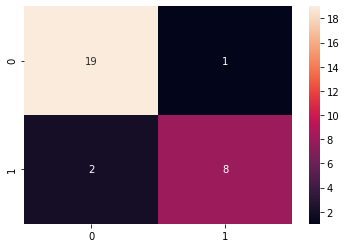

In [646]:
### Importamos el objeto:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculamos la métrica:
cm = confusion_matrix(y_test, model.predict(X_test))

sns.heatmap(cm, annot=True)

<a id='Metricas_Accuracy'></a>
#### 5.2.2 Accuracy (Porcentaje de acierto)

In [647]:
### Importamos el objeto:
from sklearn.metrics import accuracy_score

# Calculamos la métrica:
acu = accuracy_score(y_test, model.predict(X_test))

acu

0.9

<a id='Metricas_Precision'></a>
#### 5.2.3 Precision

In [657]:
### Importamos el objeto:
from sklearn.metrics import precision_score

# Calculamos la métrica:
precision = precision_score(y_test, model.predict(X_test))

precision

0.8888888888888888

<a id='Metricas_Recall'></a>
#### 5.2.4 Recall

In [656]:
### Importamos el objeto:
from sklearn.metrics import recall_score

# Calculamos la métrica:
recall = recall_score(y_test, model.predict(X_test))

recall

0.8

<a id='Metricas_F1'></a>
#### 5.2.5 F1-score

In [655]:
### Importamos el objeto:
from sklearn.metrics import f1_score

# Calculamos la métrica:
f1 = f1_score(y_test, model.predict(X_test))

f1

0.8421052631578948

<a id='Metricas_AUC'></a>
#### 5.2.5 AUC y Curva ROC

In [654]:
### Importamos el objeto:
from sklearn.metrics import roc_auc_score

# Calculamos la métrica:
auc = roc_auc_score(y_test, model.predict(X_test))

auc

0.875

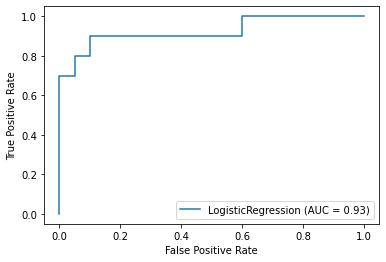

In [667]:
plot_roc_curve(model, X_test, y_test)

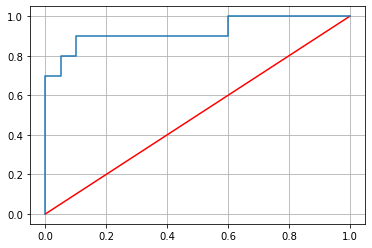

In [671]:
### Importamos el objeto:
from sklearn.metrics import roc_curve

# Calculamos la métrica:
fpr, tpr, thresholds = roc_curve(list(y_test), list(model.predict_proba(X_test)[:, 1]))

plt.plot(np.linspace(0, 1, 50), np.linspace(0, 1, 50), 'red')
plt.plot(fpr, tpr)
plt.grid();

<a id='Ejemplos'></a>
## 6. Ejemplos

Este apartado vas a ser tú quien lo complete. Vas a disponer de un apartado para cada uno de los modelos que hemos visto. Tendremos un dataset para regresión y otro de clasificación.

<a id='Ejemplos_Regresion'></a>
### 6.1 Regresión

En este caso, utilizaremos el dataset del Titanic e intentaremos predecir el precio del billete (``Fare``):

In [680]:
df = pd.read_csv("0_RESUMEN/data/titanic.csv", sep='\t')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


Antes de nada, transforma los datos y divídelos en train/test:

<a id='Ejemplos_Regresion_Lineal'></a>
#### 6.1.1 Regresión Lineal

<a id='Ejemplos_Regularizacion'></a>
#### 6.1.2 Regularización

<a id='Ejemplos_Ridge'></a>
##### 6.1.2.1 Ridge

<a id='Ejemplos_Lasso'></a>
##### 6.1.2.2 Lasso

<a id='Ejemplos_Elastic_Net'></a>
##### 6.1.2.3 Elastic Net

<a id='Ejemplos_Regresion_Arboles_de_decision'></a>
#### 6.1.3 Árboles de decisión (Regresión)

<a id='Ejemplos_Support_Vector_Regressor'></a>
#### 6.1.4 Support Vector Regressor (SVR)

<a id='Ejemplos_SVR_Lineal'></a>
##### 6.1.4.1 SVR Lineal

<a id='Ejemplos_SVR_kernel'></a>
##### 6.1.4.2 SVR con kernel

<a id='Ejemplos_Clasificacion'></a>
### 6.2 Clasificación

En este caso, vamos a basarnos en el mismo dataset, el del Titanic, pero vamos a predecir el tipo de embarque de los pasajeros (``Embarked``):

Al igual que antes, transforma los datos y divídelos en train/test:

<a id='Ejemplos_Regresion_Logistica'></a>
#### 6.2.1 Regresión Logística

<a id='Ejemplos_Clasificacion_Arboles_de_decision'></a>
#### 6.2.2 Árboles de decisión

<a id='Ejemplos_Clasificacion_KNN'></a>
#### 6.2.3 K Nearest Neighbor (KNN)

<a id='Ejemplos_Support_Vector_Classifier'></a>
#### 6.2.4 Support Vector Classifier (SVC)

<a id='Ejemplos_SVC_Lineal'></a>
##### 6.2.4.1 SVC Lineal

<a id='Ejemplos_SVC_kernel'></a>
##### 6.2.4.2 SVR con kernel